## Demo: using the code in the syseng throughputs repository and the throughputs curves!

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import lsst.syseng.throughputs as st

The code in the syseng throughputs repository (../python/lsst/syseng/throughputs) contains utilities to read the components of the bandpass input (bandpassUtils), utilities to read the example SEDs in the repository (sedUtils), and code to calculate relevant m5 and effective wavelength values for the bandpasses (m5Utils). 

By entering ```help(st.bandpassUtils)```, etc., more information on the code in those files is available.

### Reading the bandpass components. 

In [2]:
# Set the directories to read the component information from. 
defaultDirs = st.setDefaultDirs()
defaultDirs

{'detector': '/Users/lynnej/lsstRepos/syseng_throughputs/components/camera/detector/joint_minimum',
 'lens1': '/Users/lynnej/lsstRepos/syseng_throughputs/components/camera/lens1',
 'lens2': '/Users/lynnej/lsstRepos/syseng_throughputs/components/camera/lens2',
 'lens3': '/Users/lynnej/lsstRepos/syseng_throughputs/components/camera/lens3',
 'filters': '/Users/lynnej/lsstRepos/syseng_throughputs/components/camera/filters',
 'mirror1': '/Users/lynnej/lsstRepos/syseng_throughputs/components/telescope/mirror1',
 'mirror2': '/Users/lynnej/lsstRepos/syseng_throughputs/components/telescope/mirror2',
 'mirror3': '/Users/lynnej/lsstRepos/syseng_throughputs/components/telescope/mirror3',
 'atmosphere': '/Users/lynnej/lsstRepos/syseng_throughputs/siteProperties'}

In [3]:
# Read the atmosphere file. This is the default atmosphere, but you could use another one. 
# Note that the bandpass information (atmosphere, hardware, system, etc.) 
#   is returned in lsst.sims.photUtils.Bandpass objects
atmos = st.readAtmosphere(defaultDirs['atmosphere'], atmosFile='pachonModtranAtm_12_aerosol.dat')

In [4]:
# Read the hardware components,
# and build the combined hardware (without atmosphere) and system (with atmosphere) throughput curves.
hardware, system = st.buildHardwareAndSystem(defaultDirs, addLosses=True, 
                                             atmosphereOverride=None, shiftFilters=None)

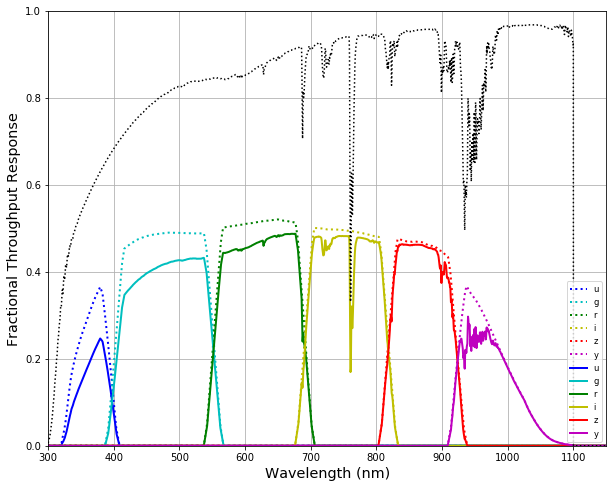

In [5]:
# Let's plot the results.
plt.figure(figsize=(10, 8))
st.plotBandpasses(hardware, newfig=False, linestyle=':', addlegend=False)
st.plotBandpasses(system, newfig=False, linestyle='-')
plt.plot(atmos.wavelen, atmos.sb, 'k:')

### Let's look at the m5 and related values.

Note that for this (for the fiducial values) we really want X=1.0 atmosphere, so let's fix that.

In [6]:
atmos = st.readAtmosphere(defaultDirs['atmosphere'], atmosFile='atmos_10_aerosol.dat')
hardware, system = st.buildHardwareAndSystem(defaultDirs, addLosses=True, 
                                             atmosphereOverride=atmos, shiftFilters=None)

In [7]:
m5info = st.makeM5(hardware, system, X=1.0)
m5info

,FWHMeff,FWHMgeom,skyMag,skyCounts,Zp_t,Tb,Sb,kAtm,gamma,Cm,dCm_infinity,dCm_double,m5,sourceCounts,m5_fid,m5_min
u,0.92,0.80824,22.989546,70.402589,26.919604,0.032999,0.051867,0.490961,0.038145,23.085013,0.624762,0.400002,23.783061,539.185796,23.9,23.4
g,0.87,0.76714,22.255978,406.358769,28.366877,0.125145,0.152329,0.213422,0.038738,24.420410,0.177912,0.094067,24.812346,792.380316,25.0,24.6
r,0.83,0.73426,21.197245,812.576131,28.147923,0.102290,0.114880,0.126029,0.038987,24.441112,0.096749,0.048087,24.354784,987.134920,24.7,24.3
i,0.80,0.70960,20.476708,1144.015607,27.828597,0.076226,0.083291,0.096238,0.039091,24.324427,0.070581,0.033988,23.917802,1100.118328,24.0,23.6
z,0.78,0.69316,19.599918,1715.474293,27.419273,0.052285,0.055697,0.068652,0.039221,24.158130,0.048174,0.022328,23.340598,1284.077901,23.3,22.9
y,0.76,0.67672,18.611865,2283.488487,26.640092,0.025509,0.029842,0.170317,0.039299,23.730486,0.036627,0.016450,22.447130,1426.612169,22.1,21.7


In [8]:
# Want to see a subset of those columns?
cols = ['Cm', 'dCm_infinity', 'm5', 'm5_fid', 'm5_min']
m5info[cols]

,Cm,dCm_infinity,m5,m5_fid,m5_min
u,23.085013,0.624762,23.783061,23.9,23.4
g,24.420410,0.177912,24.812346,25.0,24.6
r,24.441112,0.096749,24.354784,24.7,24.3
i,24.324427,0.070581,23.917802,24.0,23.6
z,24.158130,0.048174,23.340598,23.3,22.9
y,23.730486,0.036627,22.447130,22.1,21.7


In [9]:
# And we can calculate the effective wavelengths.
effwavelens = st.get_effwavelens(system)
effwavelens

array([ 368.29463482,  479.89197923,  622.65833619,  754.21787857,
        869.07396071,  973.27183687])

In [10]:
# BTW - need some or all of the values in m5info in a latex version? 
print(m5info[cols].to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &         Cm &  dCm\_infinity &         m5 &  m5\_fid &  m5\_min \\
\midrule
u &  23.085013 &      0.624762 &  23.783061 &    23.9 &    23.4 \\
g &  24.420410 &      0.177912 &  24.812346 &    25.0 &    24.6 \\
r &  24.441112 &      0.096749 &  24.354784 &    24.7 &    24.3 \\
i &  24.324427 &      0.070581 &  23.917802 &    24.0 &    23.6 \\
z &  24.158130 &      0.048174 &  23.340598 &    23.3 &    22.9 \\
y &  23.730486 &      0.036627 &  22.447130 &    22.1 &    21.7 \\
\bottomrule
\end{tabular}

